<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final/online_shoppers_intention.csv')

# 1. Exploratory Data Analysis (EDA)

In [100]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... Browser  Region  \
0         0.20       0.20         0.0         0.0  ...       1       1   
1         0.00       0.10         0.0         0.0  ...       2       1   
2         0.20       0.20         0.0         0.0  ...       1       9   
3         0.05       0.14         0.0         0.0  ...       2       2   
4         0.02       0.05         0.0         0.0  ...       3       1   

   TrafficType        VisitorType  Weekend Revenue  Admin_Info_Combined  \
0            1  Returning_Visitor    False   False                    0   
1            2  Returning_Visitor    False   False                    0   
2            3  Returning_Visitor    False   False                    0   
3            4  Returning_Visitor    False   False                    0   
4            4  Returning_Visitor     True   False                    0   

     Duration  Re-Visitor  PageVisiting  
0    0.000000           1             1  
1   64.000000           1             2  
2    0.000000           1             1  
3    2.666667           1             2  
4  627.500000           1            10  

[5 rows x 22 columns]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [102]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

       Admin_Info_Combined      Duration    Re-Visitor  PageVisiting  
count         12330.000000  12330.000000  12330.000000  12330.000000  
mean              2.818735   1310.037228      0.855718     34.550203  
std               3.978385   2037.801702      0.351390     46.514053  
min               0.000000      0.000000      0.000000      0.000000  
25%               0.000000    222.000000      1.000000      8.000000  
50%               1.000000    680.000000      1.000000     20.000000  
75%               4.000000   1626.908333      1.000000     42.000000  
max              41.000000  69921.647230      1.000000    746.000000

In [103]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Admin_Info_Combined        0
Duration                   0
Re-Visitor                 0
PageVisiting               0
dtype: int64

So, there is no missing value. A nice start

In [104]:
for col in df.columns:
  print(col, df[col].unique())

Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

Visualizing distribution of variables

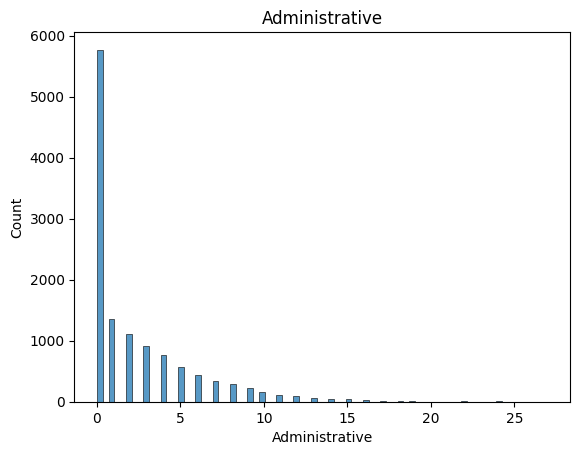

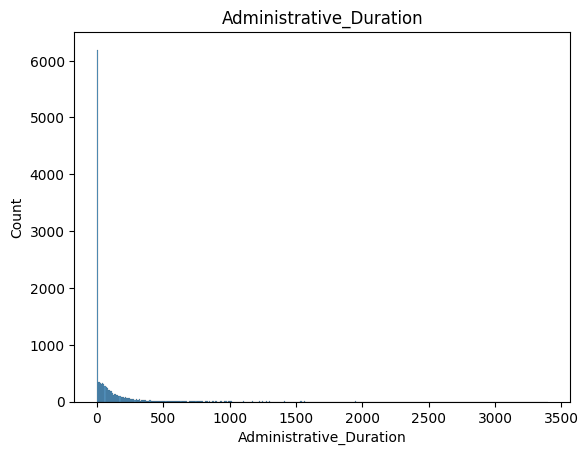

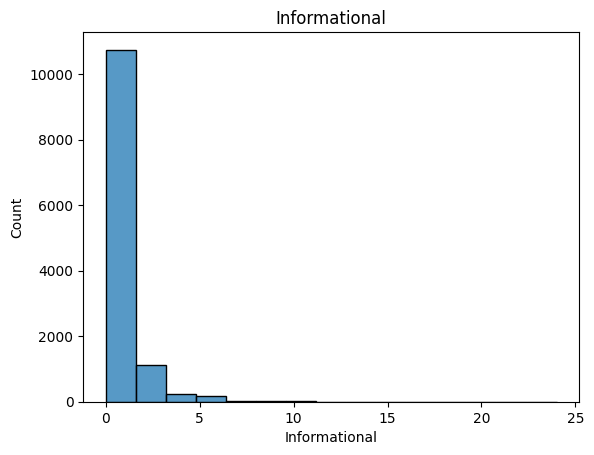

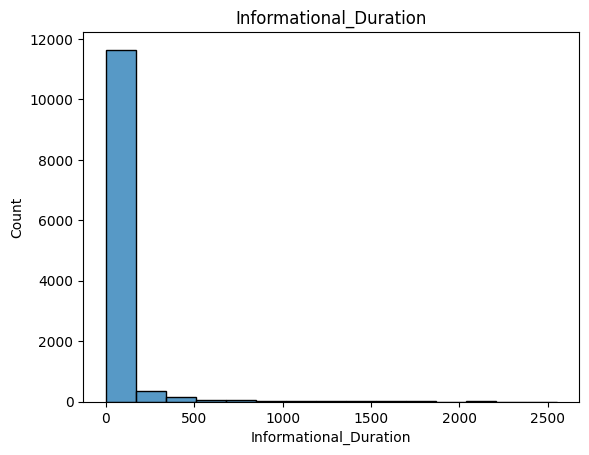

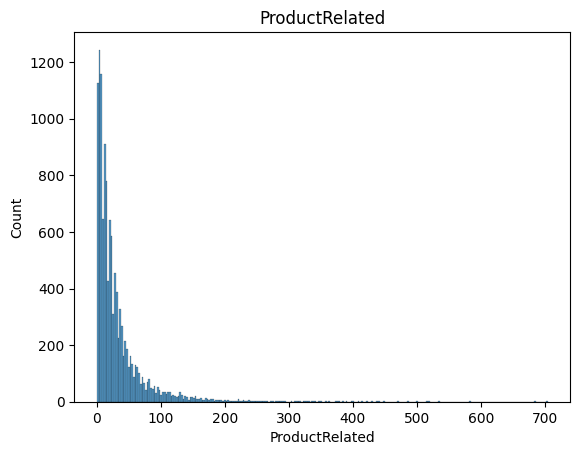

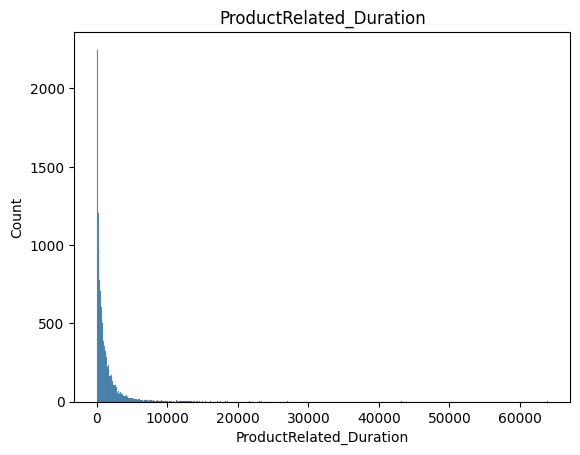

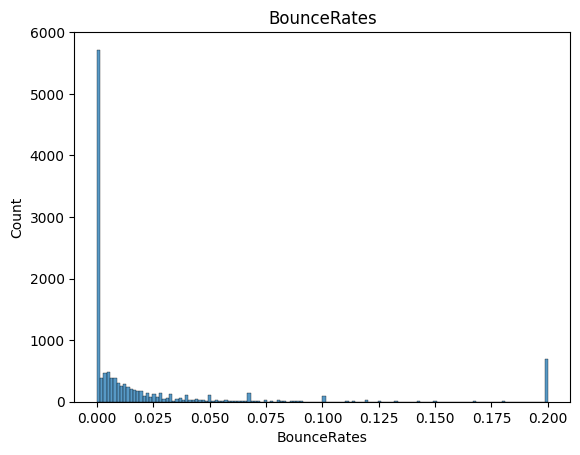

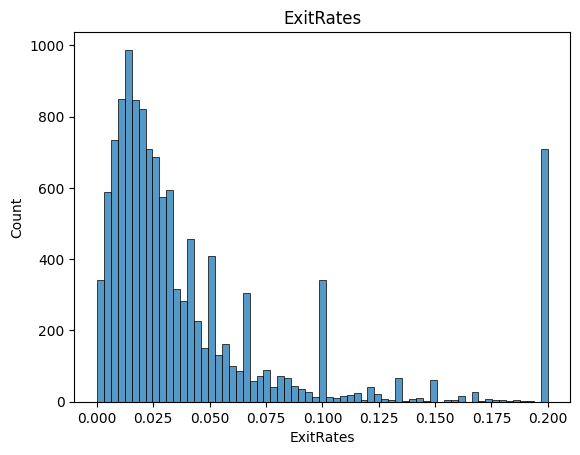

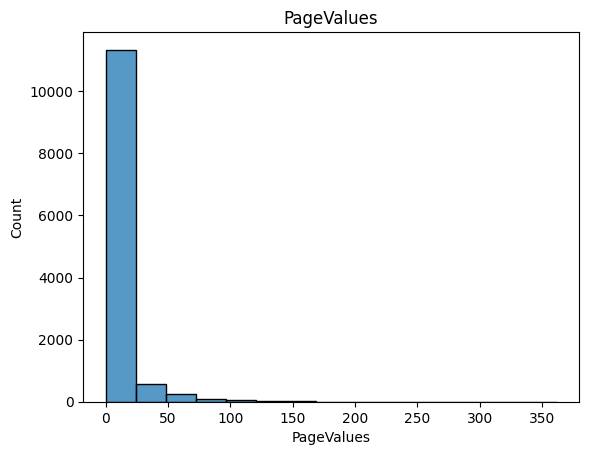

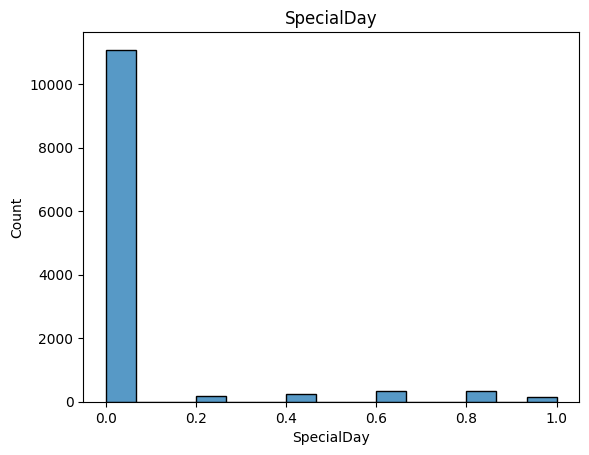

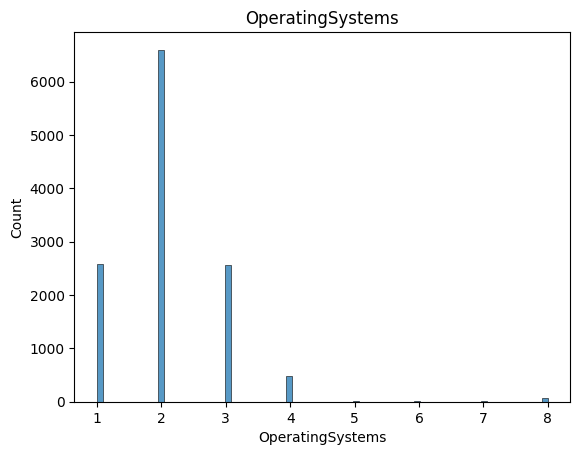

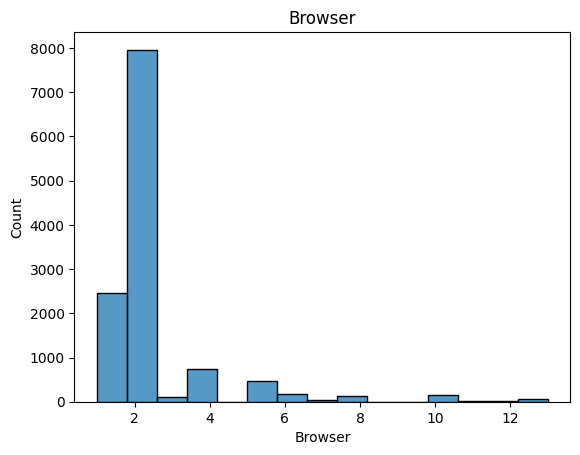

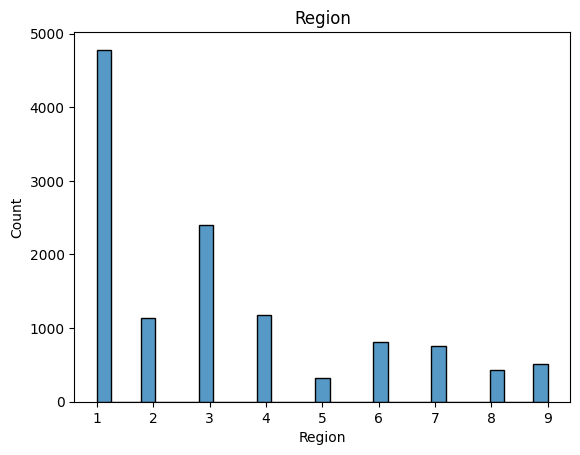

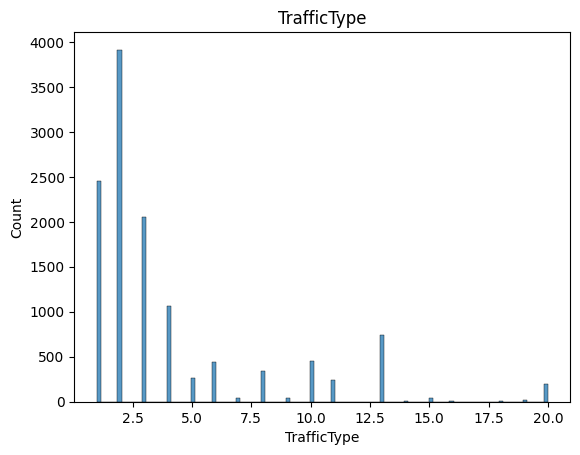

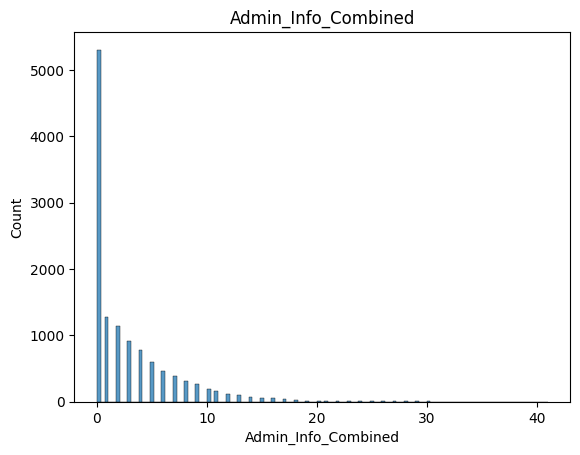

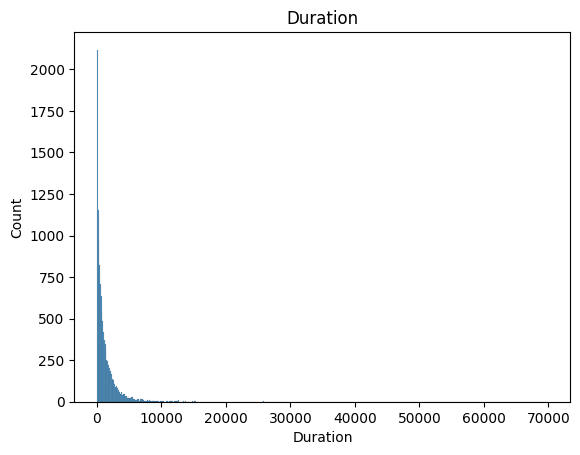

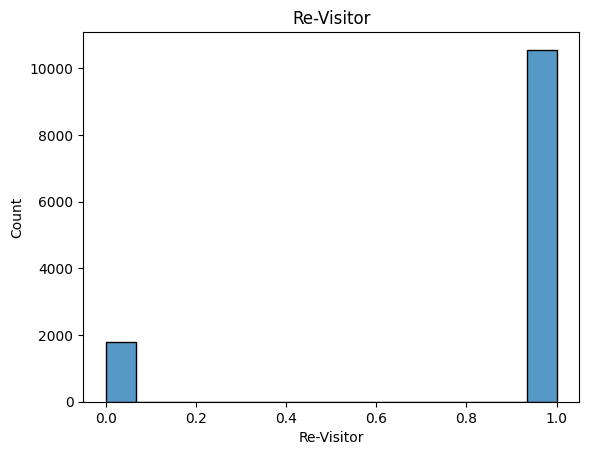

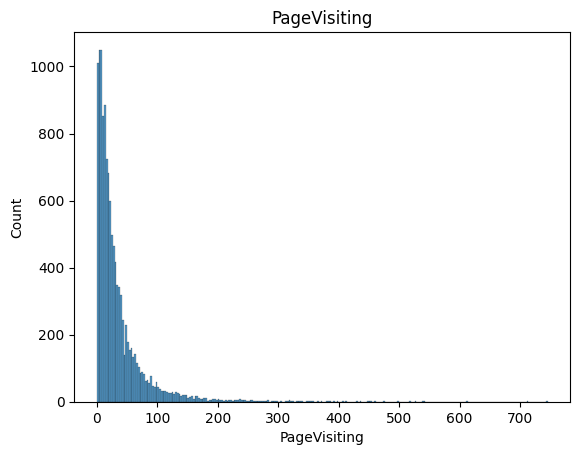

In [105]:
for col in df.select_dtypes(include=['float', 'int']).columns:
  plt.figure()
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

<Figure size 1200x800 with 0 Axes>

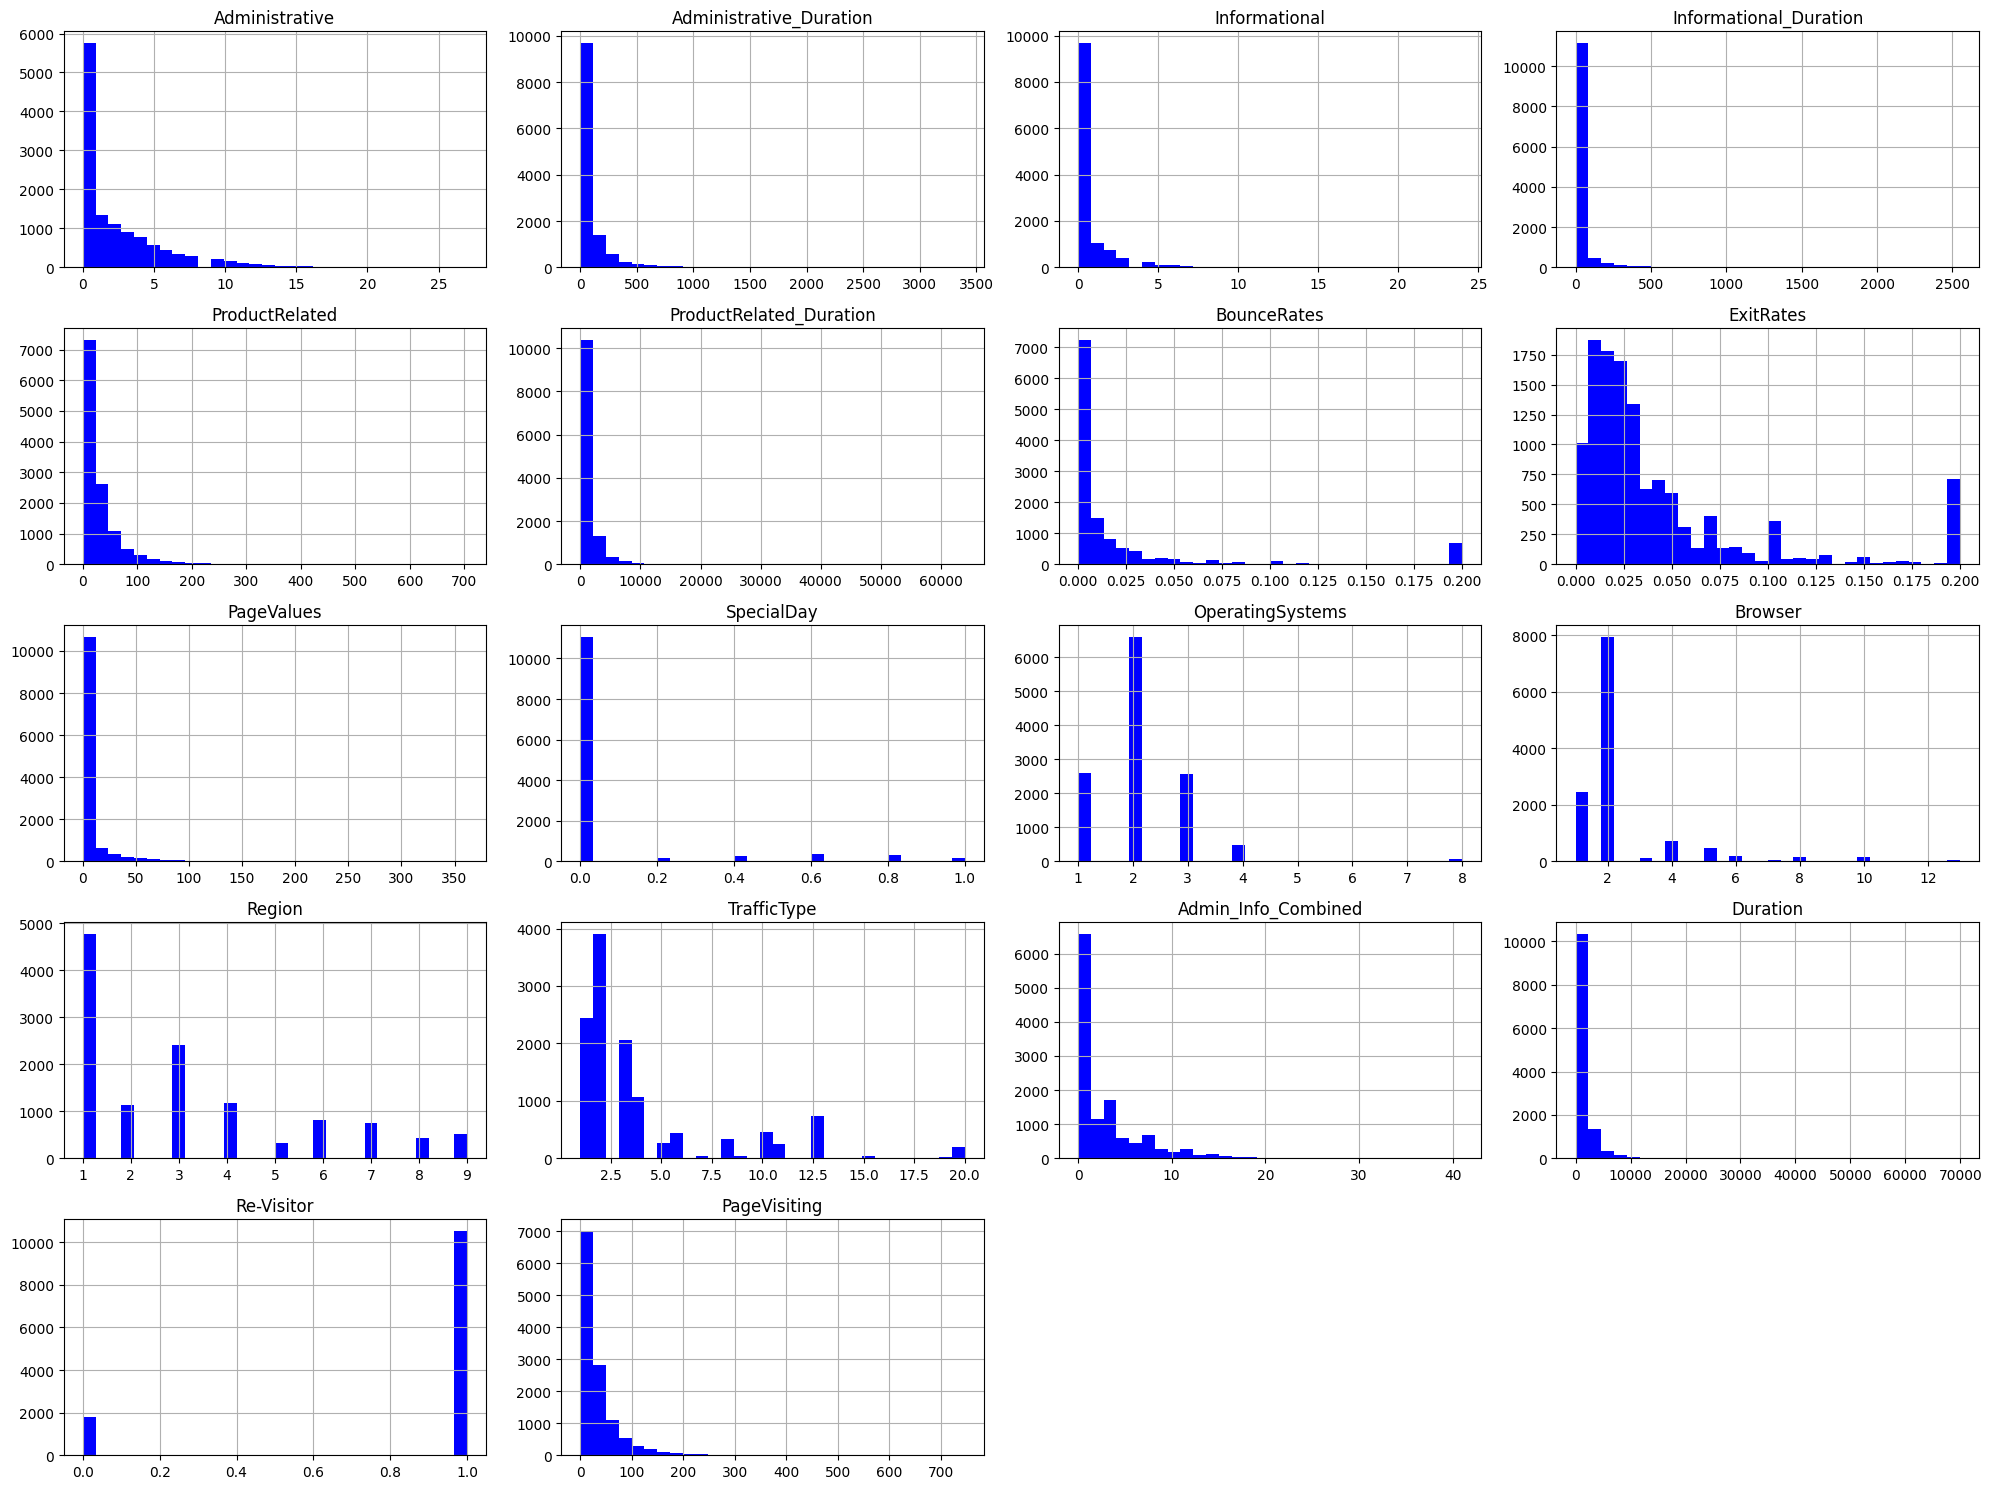

In [106]:
#Let's see the distributions of variables all together
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(20, 15), layout=(5, 4), color='blue')
plt.tight_layout()
plt.show()

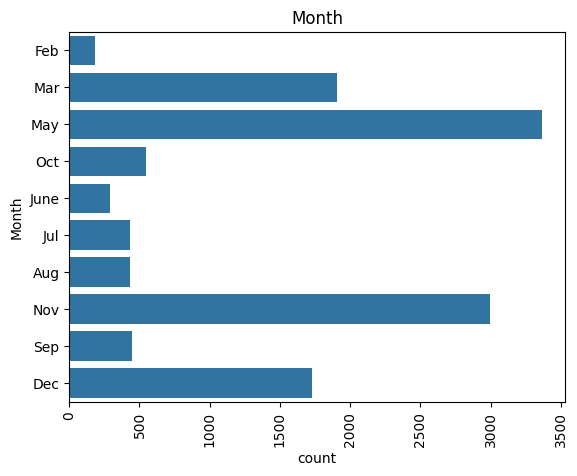

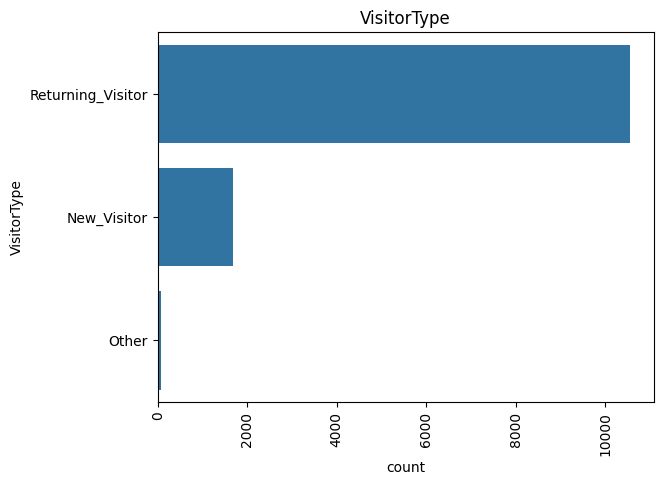

In [107]:
for col in df.select_dtypes(include=['object']).columns:
  plt.figure()
  sns.countplot(df[col])
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()

<ipython-input-108-382fac81d9c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Revenue'], palette='coolwarm')


Text(0.5, 1.0, 'Revenue')

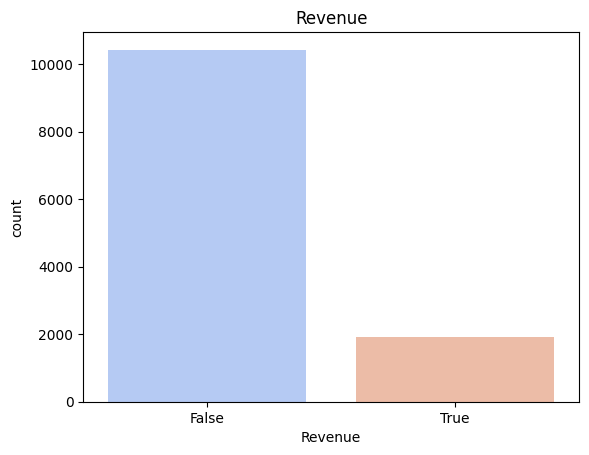

In [108]:
sns.countplot(x = df['Revenue'], palette='coolwarm')
plt.title('Revenue')

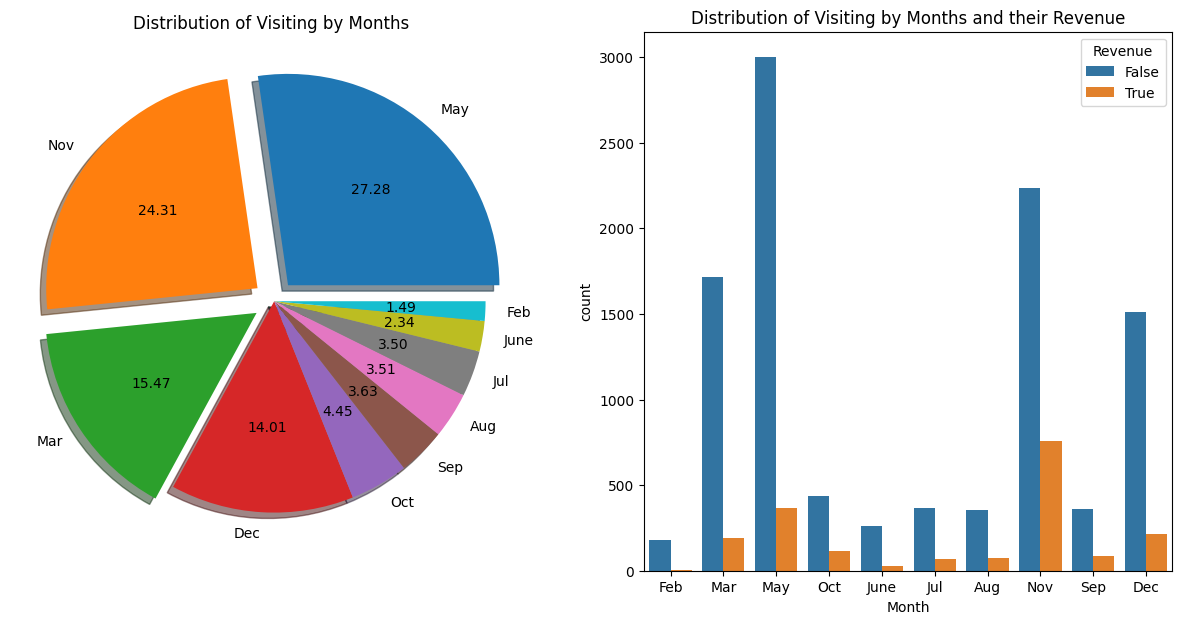

In [109]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of Visiting by Months ')
plt.pie(x = df['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))


plt.subplot(1,2,2)
plt.title('Distribution of Visiting by Months and their Revenue')
sns.countplot(x= 'Month', hue = 'Revenue', data = df)
plt.show()

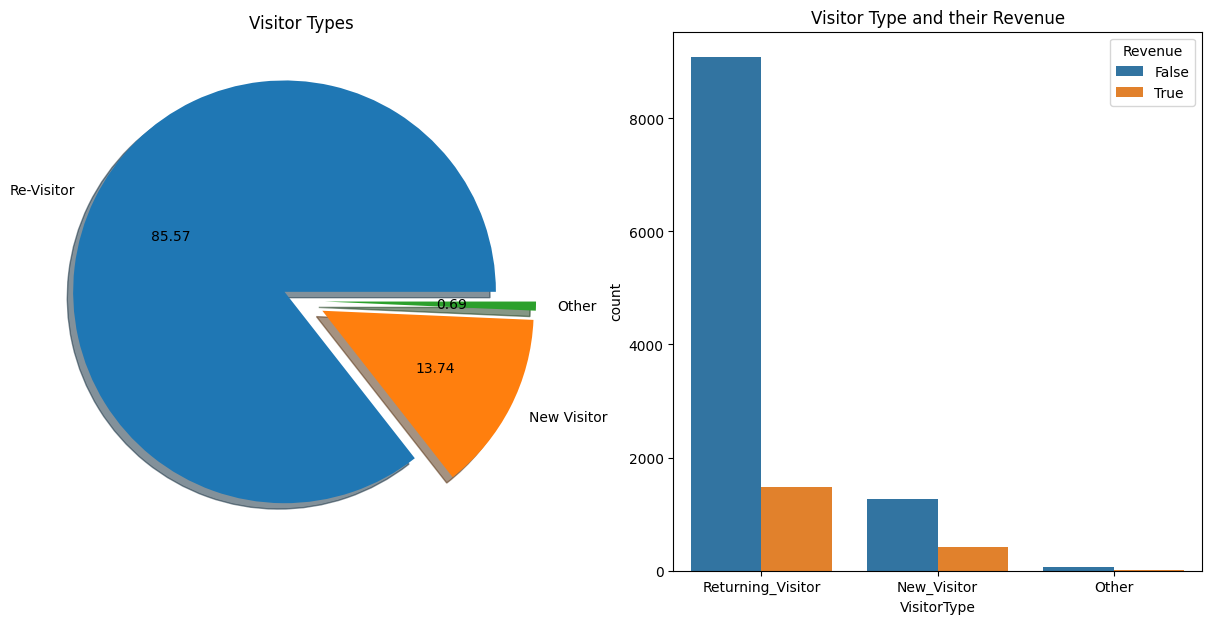

In [110]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Visitor Types ')
plt.pie(x = df['VisitorType'].value_counts(),
       labels =['Re-Visitor', 'New Visitor', 'Other'] ,
       autopct='%.2f',
       shadow = True,
       explode = (0.1,0.1,0.1))


plt.subplot(1,2,2)
plt.title('Visitor Type and their Revenue')
sns.countplot(x= 'VisitorType', hue = 'Revenue', data = df)
plt.show()

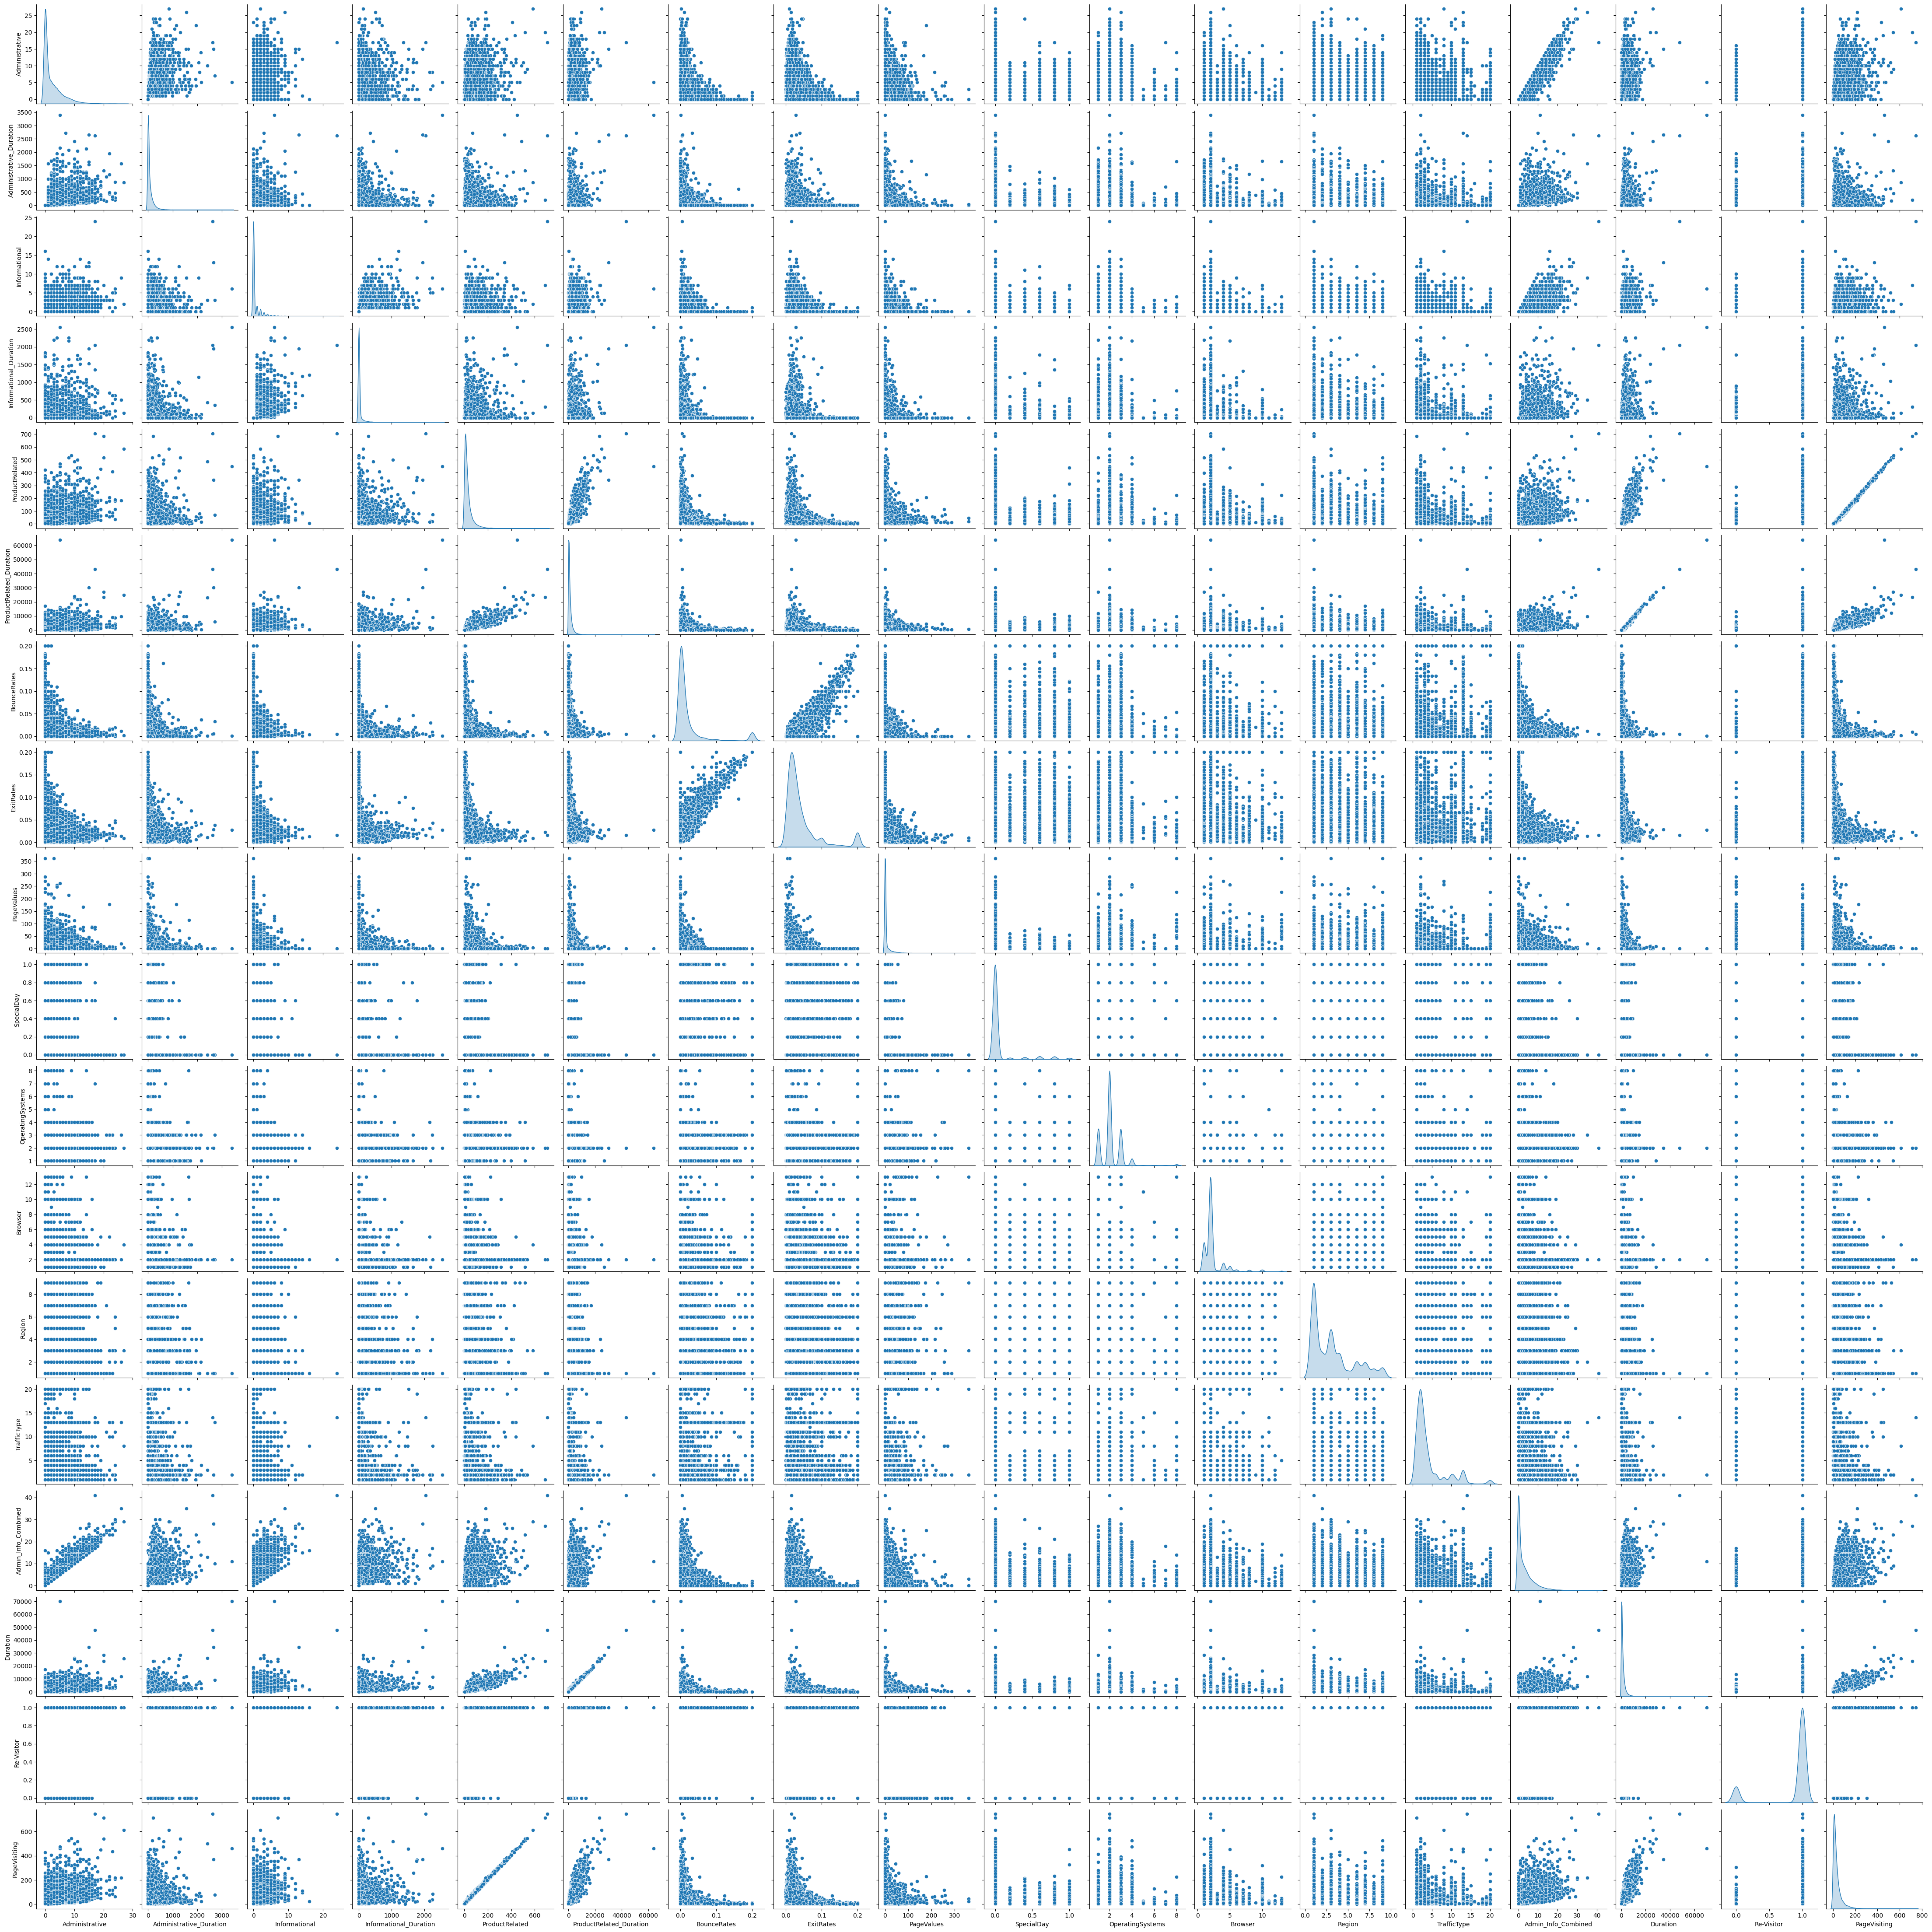

In [112]:
# prompt: now I want to plot to understand correlation between variables, not correlation matrix but check features one with anothe

import matplotlib.pyplot as plt
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df.select_dtypes(include=['float', 'int']), diag_kind='kde')
plt.show()


# 2. Data Preprocessing

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Let me identify categorical and numerical features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

Handling missing values

In [55]:
# handling missing values in both of categories
from sklearn.impute import SimpleImputer
if categorical_cols.size > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = imputer_cat.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])

Already we have seen above, there is no missing value in dataset. Also, in description of dataset, it is stated that there is no missing value.

---



In [56]:
import numpy as np
if numerical_cols.size > 0:
    #imputation
    X_train[numerical_cols] = X_train[numerical_cols].replace([np.inf, -np.inf], np.nan)
    X_test[numerical_cols] = X_test[numerical_cols].replace([np.inf, -np.inf], np.nan)

    imputer_num = SimpleImputer(strategy='mean')
    X_train[numerical_cols] = imputer_num.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = imputer_num.transform(X_test[numerical_cols])

Encoding categorical variables

In [57]:
#Label Encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
if categorical_cols.size > 0:
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

    for col in categorical_cols:
        X_test[col] = label_encoders[col].transform(X_test[col])

Standardizing numerical features

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# 3. Feature Engineering

In [58]:
#Let me create a new features: 'Admin Info', 'Duration', 'Re-Visitor' and 'PageVisiting'
df['Admin_Info_Combined'] = df['Administrative'] + df['Informational']
df['Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Re-Visitor'] = df['VisitorType'].apply(lambda x: 1 if x == 'Returning_Visitor' else 0)
df['PageVisiting'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = X.columns

importance = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importance)[::-1]

print("Sorted Feature List:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importance[indices[f]]))



Sorted Feature List:
1. PageValues (0.376961)
2. ExitRates (0.091718)
3. ProductRelated_Duration (0.089778)
4. ProductRelated (0.072876)
5. Administrative_Duration (0.058396)
6. BounceRates (0.056093)
7. Month (0.043137)
8. Administrative (0.041713)
9. TrafficType (0.031926)
10. Region (0.031065)
11. Informational_Duration (0.027111)
12. Browser (0.018187)
13. Informational (0.017925)
14. OperatingSystems (0.017047)
15. VisitorType (0.013439)
16. Weekend (0.009279)
17. SpecialDay (0.003350)


In [60]:
#correlation matrix
correlation_matrix = X_train[numerical_cols].corr()

print(correlation_matrix)


                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.591798   
Administrative_Duration        0.591798                 1.000000   
Informational                  0.375070                 0.298518   
Informational_Duration         0.253718                 0.227784   
ProductRelated                 0.432604                 0.290101   
ProductRelated_Duration        0.372136                 0.356483   
BounceRates                   -0.221412                -0.141862   
ExitRates                     -0.313816                -0.204023   
PageValues                     0.095305                 0.072598   
SpecialDay                    -0.093222                -0.067439   
OperatingSystems              -0.006473                -0.006037   
Browser                       -0.025264                -0.012773   
Region                        -0.004876                -0.005233   
TrafficType                   -0.030842         

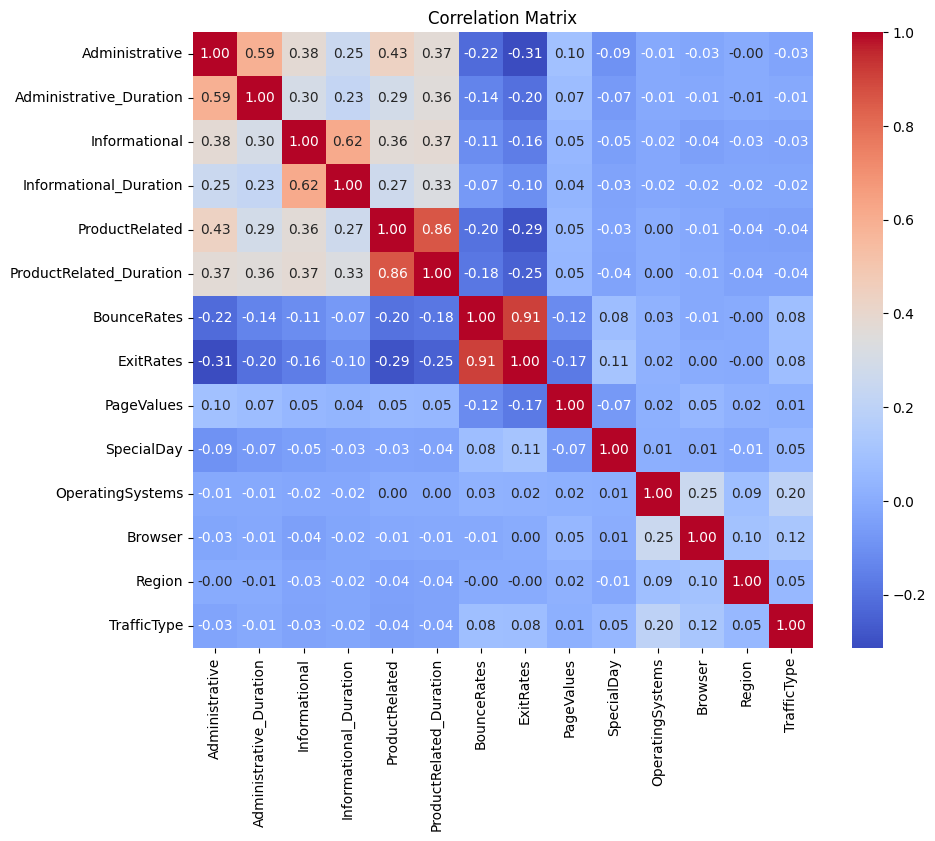

In [61]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Correlation between features can be seen above


# 4.Model Building

In [62]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(9864, 17)
(2466, 17)
(9864,)
(2466,)


In [63]:
#Let me start by Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("ROC-AUC:", roc_auc_lr)


Logistic Regression Metrics:
Accuracy: 0.8661800486618005
Precision: 0.7035175879396985
Recall: 0.340632603406326
F1-score: 0.45901639344262296
ROC-AUC: 0.6559610705596107


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Since target is binary and not continuous, we cannot directly compare the prediction with the actual. So, let's view the model result in Confusion Matrix. I will also use it for later models.

In [64]:
from sklearn.metrics import confusion_matrix

conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_lr)


Confusion Matrix (Logistic Regression):
 [[1996   59]
 [ 271  140]]


In [65]:
#Let me continue with Decision Trees
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred_dt = decisiontree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("ROC-AUC:", roc_auc_dt)


Decision Tree Metrics:
Accuracy: 0.8609083536090836
Precision: 0.5817307692307693
Recall: 0.5888077858880778
F1-score: 0.585247883917775
ROC-AUC: 0.7520681265206812


In [66]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dt)


Confusion Matrix (Decision Tree):
 [[1881  174]
 [ 169  242]]


In [67]:
# Third model I will use is Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred_rf = randomforest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)

Random Forest Metrics:
Accuracy: 0.8921330089213301
Precision: 0.7441077441077442
Recall: 0.537712895377129
F1-score: 0.6242937853107344
ROC-AUC: 0.7503649635036496


In [68]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)


Confusion Matrix (Random Forest):
 [[1979   76]
 [ 190  221]]


In [69]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("ROC-AUC:", roc_auc_svm)


SVM Metrics:
Accuracy: 0.8353609083536091
Precision: 0.8571428571428571
Recall: 0.014598540145985401
F1-score: 0.028708133971291867
ROC-AUC: 0.5070559610705596


In [70]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)

Confusion Matrix (SVM):
 [[2054    1]
 [ 405    6]]


In [71]:
# Let me try K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("ROC-AUC:", roc_auc_knn)

K-Nearest Neighbors Metrics:
Accuracy: 0.8499594484995945
Precision: 0.6132596685082873
Recall: 0.27007299270072993
F1-score: 0.375
ROC-AUC: 0.6180048661800487


In [72]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", conf_matrix_knn)


Confusion Matrix (KNN):
 [[1985   70]
 [ 300  111]]


In [73]:
#And lastly, Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print("ROC-AUC:", roc_auc_gb)

Gradient Boosting Metrics:
Accuracy: 0.8909164639091647
Precision: 0.7290322580645161
Recall: 0.5498783454987834
F1-score: 0.6269070735090153
ROC-AUC: 0.7545012165450121


In [74]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):\n", conf_matrix_gb)


Confusion Matrix (Gradient Boosting):
 [[1971   84]
 [ 185  226]]


All of the models has given accuracy around 85-90% so it can be commented that models perform relatively well. Also, AUC scores are around 70%.

Random forest classifier has exhibited the highest accuracy with a slight difference from Gradient Boosting, accuracy comparison of all models can be seen below plots.

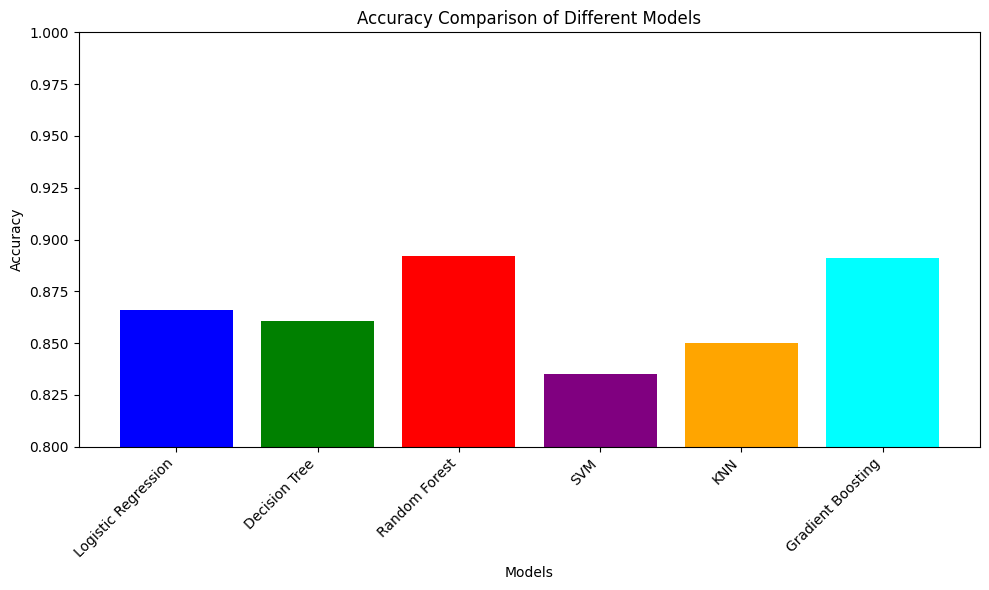

In [75]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_gb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0.8, 1.0])  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


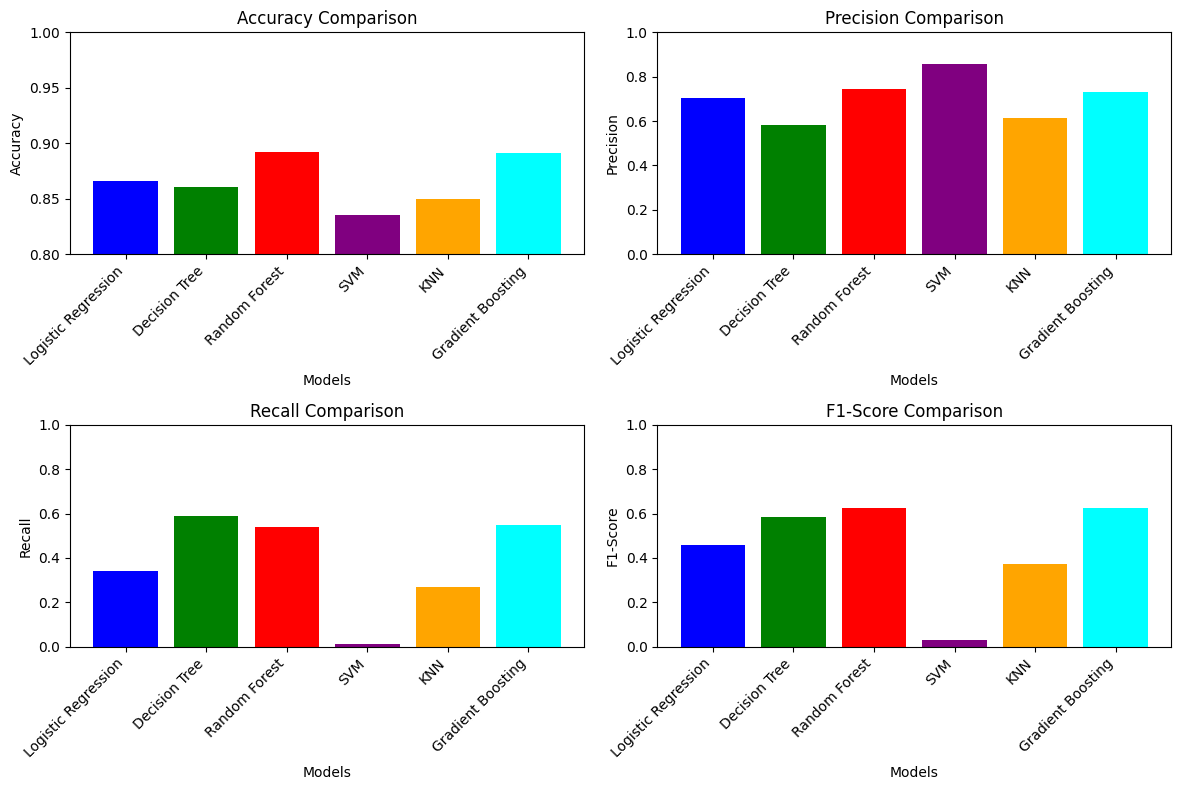

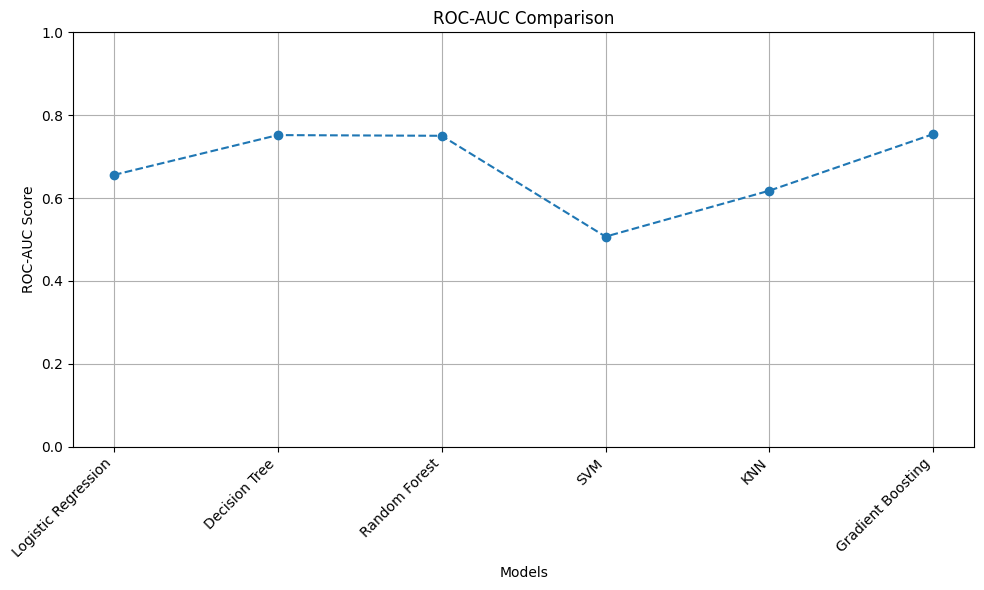

In [76]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_gb]
precisions = [precision_lr, precision_dt, precision_rf, precision_svm, precision_knn, precision_gb]
recalls = [recall_lr, recall_dt, recall_rf, recall_svm, recall_knn, recall_gb]
f1_scores = [f1_lr, f1_dt, f1_rf, f1_svm, f1_knn, f1_gb]
roc_aucs = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_svm, roc_auc_knn, roc_auc_gb]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0.8, 1.0])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
plt.bar(model_names, precisions, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.ylim([0, 1.0])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
plt.bar(model_names, recalls, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.ylim([0, 1.0])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.ylim([0, 1.0])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(model_names, roc_aucs, marker='o', linestyle='--')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Comparison')
plt.ylim([0, 1.0])
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


At Recall metric, highest score was seen in Decision Tree where F1 Score of all models were highest at Random Forest Classifier.  Also highest precision was obtained with SVM.

# 5. Model Optimization

In [77]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

best_lr_clf = grid_lr.best_estimator_

y_pred_best_lr = best_lr_clf.predict(X_test)
print("Best Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, best_lr_clf.predict_proba(X_test)[:, 1]))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Logistic Regression Model Accuracy: 0.8678021086780211
Best Logistic Regression ROC-AUC Score: 0.8118102544976645


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceba

In [78]:
# Decision Tree
param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

best_dt_clf = grid_dt.best_estimator_

y_pred_best_dt = best_dt_clf.predict(X_test)
print("Best Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, best_dt_clf.predict_proba(X_test)[:, 1]))



Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree Model Accuracy: 0.884022708840227
Best Decision Tree ROC-AUC Score: 0.9188058323121457


In [79]:
# Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

best_rf_clf = grid_rf.best_estimator_

y_pred_best_rf = best_rf_clf.predict(X_test)
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, best_rf_clf.predict_proba(X_test)[:, 1]))



Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best Random Forest Model Accuracy: 0.894566098945661
Best Random Forest ROC-AUC Score: 0.9245700652967954


Hence SVM taking so much time, just skipping

In [80]:
# KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

best_knn_clf = grid_knn.best_estimator_

y_pred_best_knn = best_knn_clf.predict(X_test)
print("Best KNN Model Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best KNN ROC-AUC Score:", roc_auc_score(y_test, best_knn_clf.predict_proba(X_test)[:, 1]))



Best parameters for KNN: {'n_neighbors': 9}
Best KNN Model Accuracy: 0.8556366585563666
Best KNN ROC-AUC Score: 0.7747888066019026


In [81]:
# Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
grid_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)

best_gb_clf = grid_gb.best_estimator_

y_pred_best_gb = best_gb_clf.predict(X_test)
print("Best Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, best_gb_clf.predict_proba(X_test)[:, 1]))


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}
Best Gradient Boosting Model Accuracy: 0.8901054339010543
Best Gradient Boosting ROC-AUC Score: 0.9278532568478757


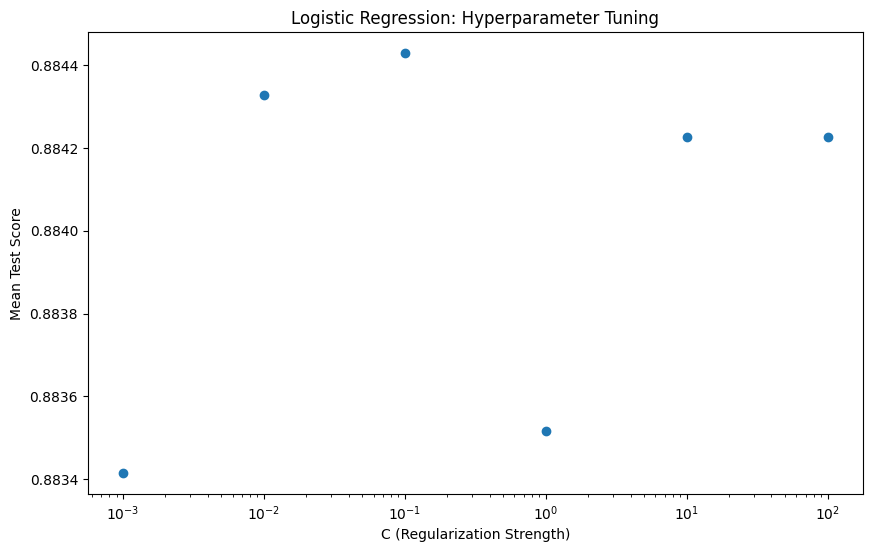

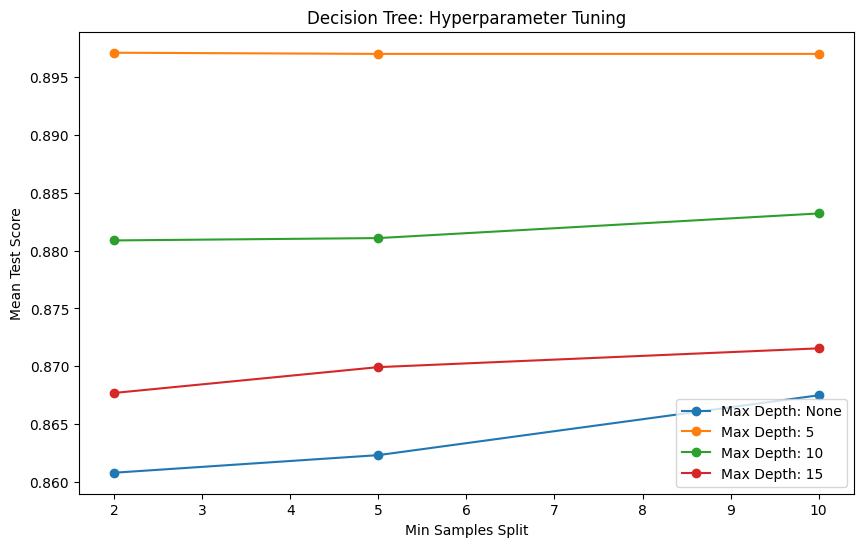

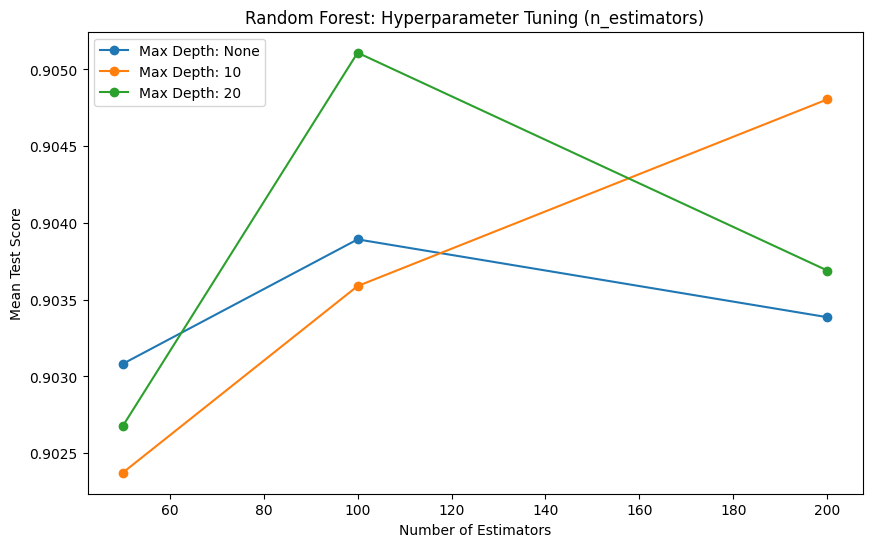

In [99]:


import matplotlib.pyplot as plt

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}

results_lr = grid_lr.cv_results_
results_dt = grid_dt.cv_results_
results_rf = grid_rf.cv_results_
results_knn = grid_knn.cv_results_
results_gb = grid_gb.cv_results_

# Plotting for Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(results_lr['param_C'], results_lr['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression: Hyperparameter Tuning')
plt.show()

# Plotting for Decision Tree
plt.figure(figsize=(10, 6))
for depth in param_grid_dt['max_depth']:
    scores = [results_dt['mean_test_score'][i] for i in range(len(results_dt['params'])) if results_dt['params'][i]['max_depth'] == depth]
    plt.plot(param_grid_dt['min_samples_split'], scores, marker='o', label=f"Max Depth: {depth}")
plt.xlabel('Min Samples Split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree: Hyperparameter Tuning')
plt.legend()
plt.show()
# Plotting for Random Forest
plt.figure(figsize=(10, 6))
for depth in param_grid_rf['max_depth']:
    scores = [results_rf['mean_test_score'][i] for i in range(len(results_rf['params'])) if results_rf['params'][i]['max_depth'] == depth]
    plt.plot(param_grid_rf['n_estimators'], scores, marker='o', label=f"Max Depth: {depth}")
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Random Forest: Hyperparameter Tuning (n_estimators)')
plt.legend()
plt.show()



We can see slight increments at accuracies of models so it can be commented that hyperparameter tuning has improved performance of the model.

Cross Validation and scores

In [84]:
object_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string labels to numerical values
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])


In [85]:

import numpy as np
from sklearn.model_selection import cross_val_score

# Logistic Regression
cv_scores_lr = cross_val_score(best_lr_clf, X, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Accuracy (Logistic Regression):", np.mean(cv_scores_lr))




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.89821573 0.89537713 0.87388483 0.86536902 0.86699108]
Mean CV Accuracy (Logistic Regression): 0.8799675587996758
Decision Tree Cross-Validation Scores: [0.91443633 0.89578264 0.89051095 0.87672344 0.87266829]
Mean CV Accuracy (Decision Tree): 0.8900243309002432
Random Forest Cross-Validation Scores: [0.92335766 0.89821573 0.89132198 0.88037307 0.88483374]
Mean CV Accuracy (Random Forest): 0.8956204379562044
KNN Cross-Validation Scores: [0.87956204 0.87550689 0.85563666 0.85563666 0.85725872]
Mean CV Accuracy (KNN): 0.864720194647202
Gradient Boosting Cross-Validation Scores: [0.91605839 0.90713706 0.88888889 0.87915653 0.88280616]
Mean CV Accuracy (Gradient Boosting): 0.894809407948094


In [86]:
# Decision Tree
cv_scores_dt = cross_val_score(best_dt_clf, X, y, cv=5)
print("Decision Tree Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Accuracy (Decision Tree):", np.mean(cv_scores_dt))



Decision Tree Cross-Validation Scores: [0.91443633 0.89578264 0.89051095 0.87672344 0.87266829]
Mean CV Accuracy (Decision Tree): 0.8900243309002432


In [87]:
# Random Forest
cv_scores_rf = cross_val_score(best_rf_clf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy (Random Forest):", np.mean(cv_scores_rf))



Random Forest Cross-Validation Scores: [0.91686942 0.8974047  0.8945661  0.88158962 0.88280616]
Mean CV Accuracy (Random Forest): 0.894647201946472


In [88]:
# KNN
cv_scores_knn = cross_val_score(best_knn_clf, X, y, cv=5)
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Accuracy (KNN):", np.mean(cv_scores_knn))



KNN Cross-Validation Scores: [0.87956204 0.87550689 0.85563666 0.85563666 0.85725872]
Mean CV Accuracy (KNN): 0.864720194647202


In [89]:
# Gradient Boosting
cv_scores_gb = cross_val_score(best_gb_clf, X, y, cv=5)
print("Gradient Boosting Cross-Validation Scores:", cv_scores_gb)
print("Mean CV Accuracy (Gradient Boosting):", np.mean(cv_scores_gb))

Gradient Boosting Cross-Validation Scores: [0.91605839 0.90713706 0.88888889 0.87956204 0.88280616]
Mean CV Accuracy (Gradient Boosting): 0.894890510948905


Cross validation scores are very high for all type of models so it can be commented that showing consistently high performance. Also, accuracies are slightly higher than the accuracies of first models so it could be said that hyperparameter tuning has improved the performance.

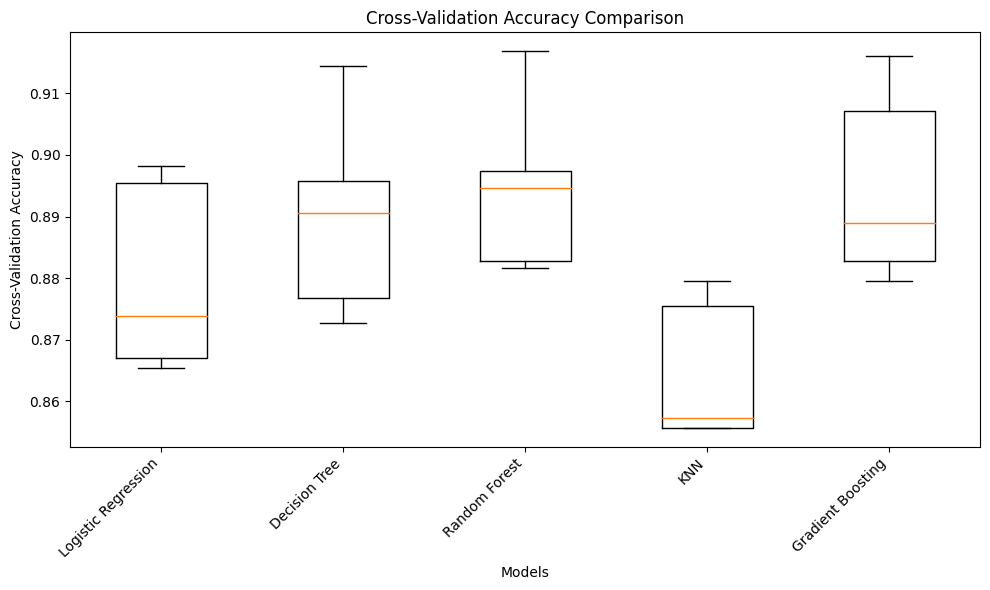

In [95]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']
cv_scores_list = [cv_scores_lr, cv_scores_dt, cv_scores_rf, cv_scores_knn, cv_scores_gb]

plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores_list, labels=model_names)
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


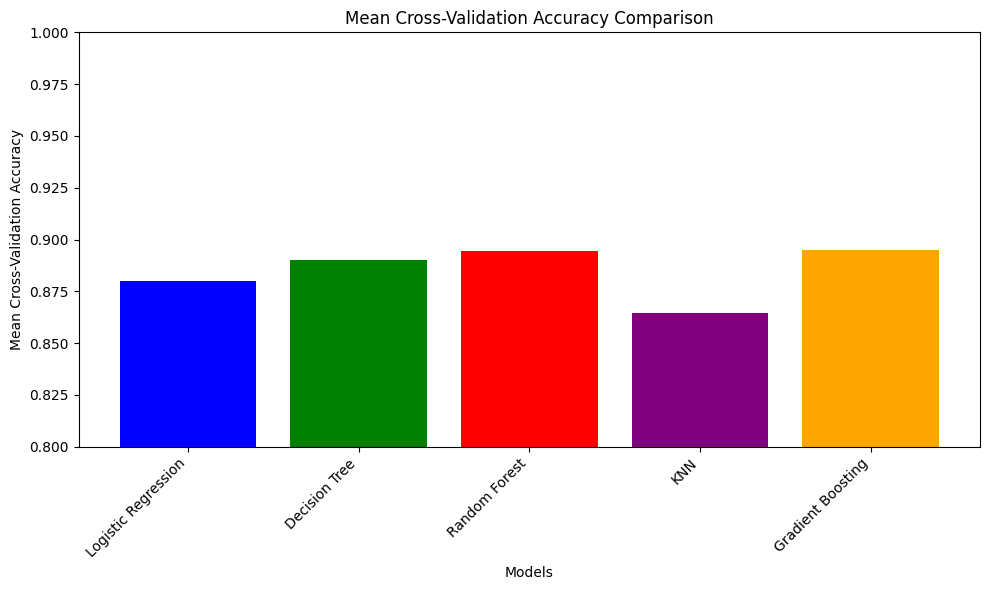

In [97]:
import matplotlib.pyplot as plt
import numpy as np
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']
cv_means = [np.mean(scores) for scores in cv_scores_list]

plt.figure(figsize=(10, 6))
plt.bar(model_names, cv_means, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy Comparison')
plt.ylim([0.8, 1.0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [90]:
# Let me set a neural network model also

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

evaluation_loss, evaluation_accuracy = model.evaluate(X_test, y_test)
print("Neural Network Test Loss:", evaluation_loss)
print("Neural Network Test Accuracy:", evaluation_accuracy)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8134 - loss: 4.4389 - val_accuracy: 0.8900 - val_loss: 0.8771
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 1.9862 - val_accuracy: 0.7283 - val_loss: 1.6071
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 1.0764 - val_accuracy: 0.8449 - val_loss: 1.0451
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 2.6687 - val_accuracy: 0.8804 - val_loss: 2.0588
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8435 - loss: 2.2675 - val_accuracy: 0.8819 - val_loss: 2.0469
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 1.8061 - val_accuracy: 0.8961 - val_loss: 0.9959
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8599 - loss: 1.1033 - val_accuracy: 0.8794 - val_loss: 0.7443
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.9997 - val_accuracy: 0.8540 - val_

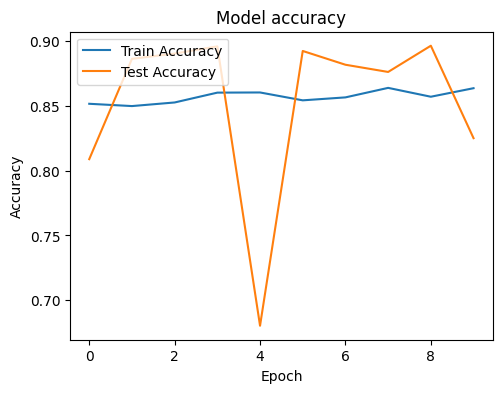

In [91]:
#Let me plot the training & test accuracies

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

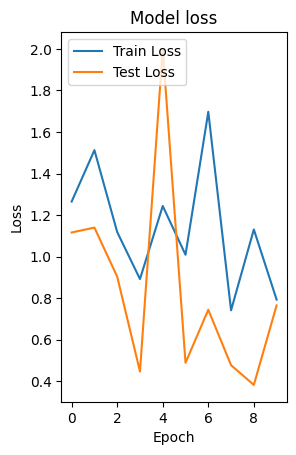

In [92]:
#Let me plot the training & test loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

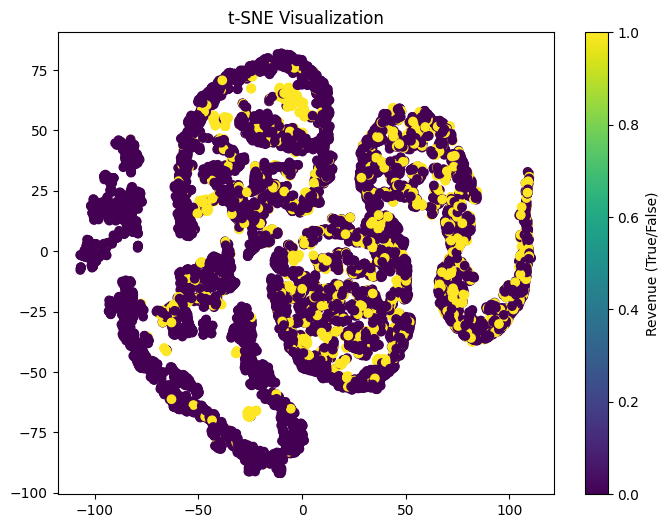

In [93]:
# Let me use t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=19)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')
plt.colorbar(label='Revenue (True/False)')
plt.show()


# 6. Insights and Conclusion


## Interpretting the results of the analysis and model

Random Forest and Gradient Boosting models achieved the highest accuracy around 90%, the high accuracy of Random Forest and Gradient Boosting suggests they are suitable for predicting revenue.

Decision Tree showed the highest recall, indicating its ability to identify positive cases so Decision Tree's high recall makes it valuable for identifying potential customers.

SVM achieved the highest precision, suggesting it minimizes false positives
Hyperparameter tuning slightly improved model performance and high precision can be useful for targeted marketing campaigns

Cross-validation demonstrated consistent model performance and that indicate model robustness

Neural Network achieved a test accuracy comparable to other models.

t-SNE visualization provides insights into data distribution and potential clusters.

## Providing actionable insights based on the findings

Given the high performance of multiple models (Random Forest, Gradient Boosting, Neural Network), it's evident that the chosen features have strong predictive power for revenue generation.

Prioritizing marketing and product development efforts to enhance the features for potential customers is important and to do so it should be focused on the most effecting features.

It can be leveraged the insights from t-SNE visualization to segment customers based on their behavioral patterns that was why I have used t-SNE but it did not give a valuable result actually.

Analyzing misclassified instances to understand why some potential revenue-generating customers were not captured can help to capture these customers also.

Implementing a system to track model performance over time and retrain as needed and conducting campaings accordingly can be beneficial so continuously collect and analyze new data to adapt strategies and stay ahead of evolving customer behavior is important.

Testing different marketing campaigns and product features based on model predictions could be beneficial, i.e utilizing A/B testing to measure the impact of these changes on revenue generation.

# Discussing limitations and potential improvements

The dataset might lack features that could significantly improve model performance. Exploring additional data sources or feature engineering could be beneficial. Also, if the dataset has a significant class imbalance (e.g., many more 'False' revenue instances than 'True'), techniques like oversampling, undersampling, or using different evaluation metrics (precision, recall, F1-score) might be needed.

Further fine-tuning of hyperparameters for each model could potentially improve results. Using more extensive grid search or randomized search techniques could be considered and for complex datasets, more sophisticated models like deep neural networks might be explored, but requires careful tuning to avoid overfitting.

Creating new features based on existing ones (e.g., interaction terms, polynomial features) to capture more complex relationships in the data could be beneficial and considered as an improvement.

Combining predictions from multiple models (e.g., stacking, voting) to potentially achieve better overall performance.

If deploying the model in a real-world setting, establish a process for continuous monitoring and retraining to adapt to potential data drift.


